# 0. Cargar y mostrar las imagenes a color

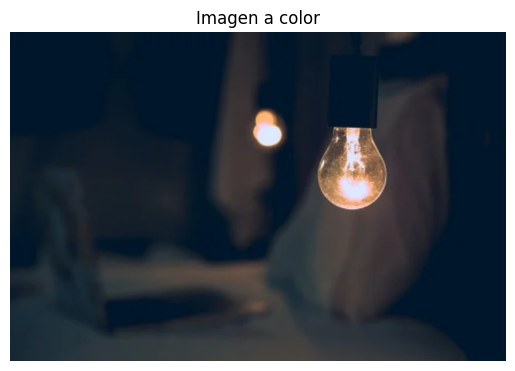

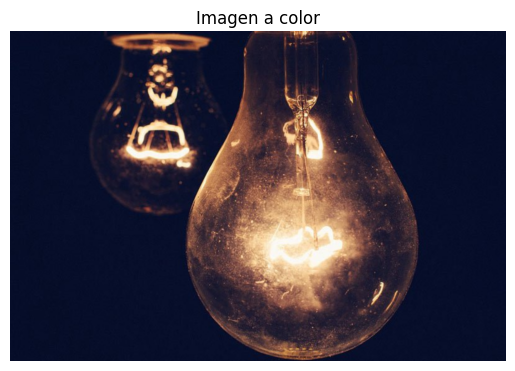

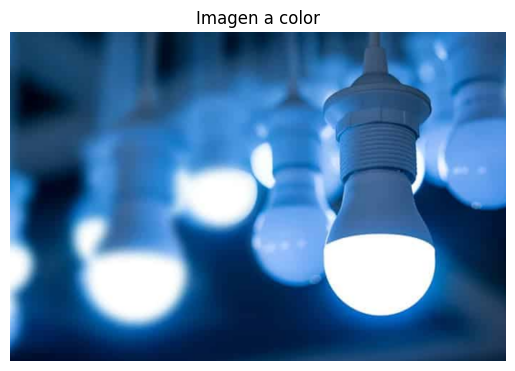

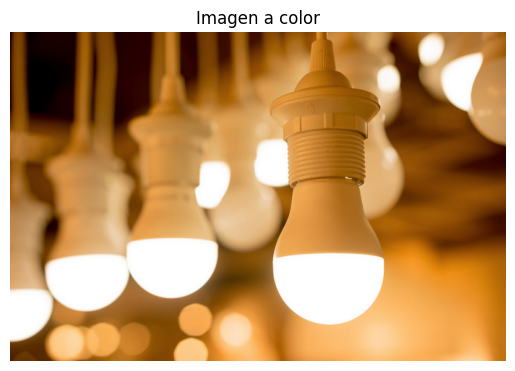

In [1]:
import cv2
import matplotlib.pyplot as plt


# Cargar las imagenes en color
imagenes = ['../image/1.png', '../image/2.png', '../image/3.png', '../image/4.png']

for i in range(len(imagenes)):

        
    # Cargar la imagen en color (por defecto cv2.imread carga en BGR)
    imagen_color = cv2.imread(imagenes[i], cv2.IMREAD_COLOR)



    # Como Matplotlib espera RGB, convertimos de BGR a RGB
    imagen_rgb = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)

    # Mostrar con Matplotlib
    plt.imshow(imagen_rgb)
    plt.title("Imagen a color")
    plt.axis("off")
    plt.show()


# 1. Operaciones morfologicas

Imagen 1:
Áreas de los objetos detectados: [8687.0, 2488.0]
Perímetros de los objetos detectados: [486.5929262638092, 195.68123936653137]
--------------------------------------------------


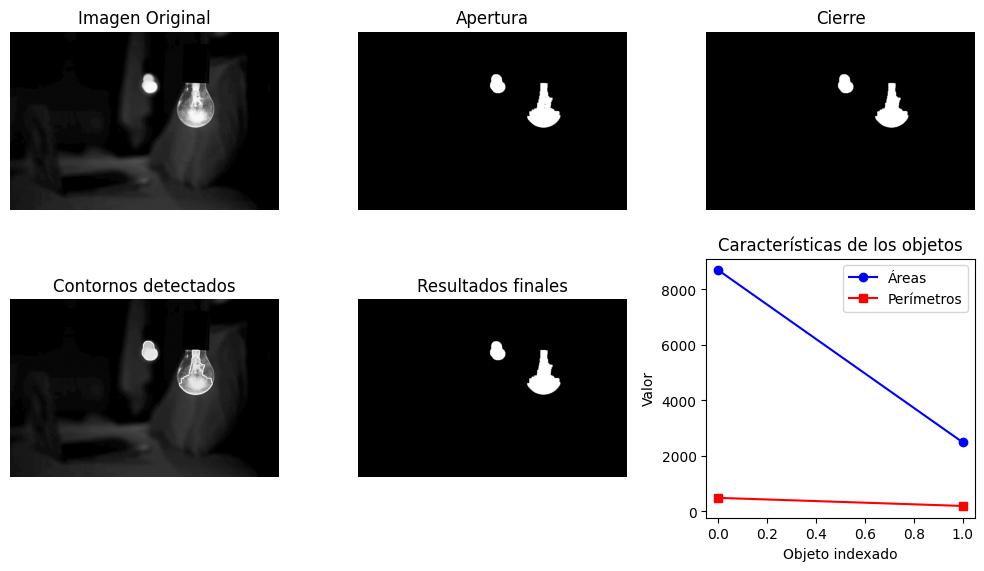

Valores de píxel en (100,200) - Imagen 1:
Original: 28
Apertura: 0
Cierre: 0
Imagen 2:
Áreas de los objetos detectados: [101.0, 36.0, 171.5, 49.0, 5356.0, 42.0, 12372.5, 62052.0, 155.5, 126.5, 42.0, 184.0, 36.0, 1884.5, 256.5, 601.5, 3109.5, 104.5]
Perímetros de los objetos detectados: [41.65685415267944, 24.0, 70.24264061450958, 28.0, 622.818322300911, 26.0, 612.0903997421265, 1937.9797900915146, 57.41421353816986, 46.38477575778961, 26.0, 67.31370830535889, 24.0, 285.58073353767395, 62.72792184352875, 160.87005710601807, 629.3797236680984, 42.24264061450958]
--------------------------------------------------


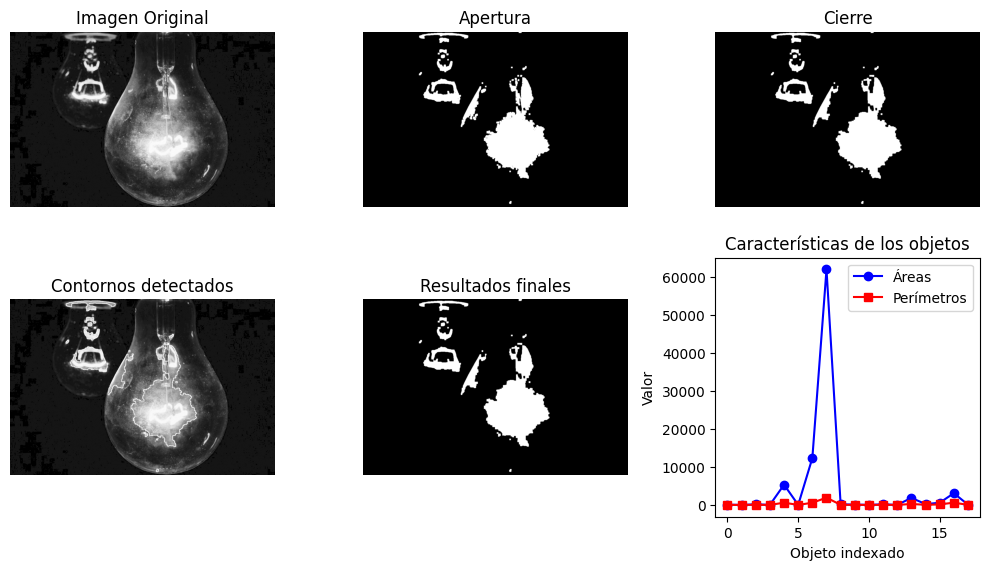

Valores de píxel en (100,200) - Imagen 2:
Original: 21
Apertura: 0
Cierre: 0
Imagen 3:
Áreas de los objetos detectados: [8002.5, 971.0, 173571.0, 38109.0]
Perímetros de los objetos detectados: [711.17871260643, 142.9116872549057, 4511.6937601566315, 1225.7543938159943]
--------------------------------------------------


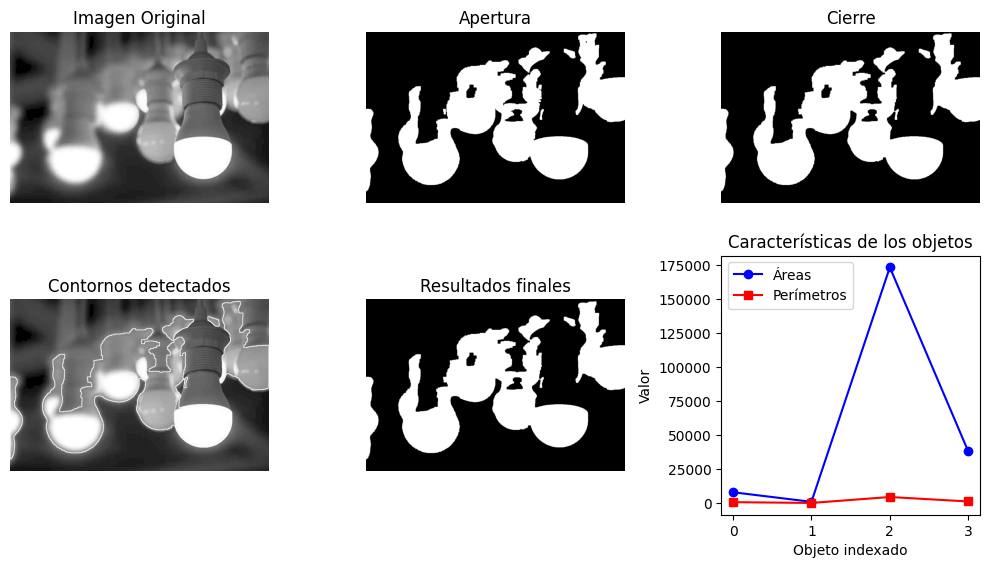

Valores de píxel en (100,200) - Imagen 3:
Original: 96
Apertura: 0
Cierre: 0
Imagen 4:
Áreas de los objetos detectados: [160.0, 704.5, 12579.5, 191242.5]
Perímetros de los objetos detectados: [55.65685415267944, 115.21320295333862, 498.0071402788162, 4099.0104377269745]
--------------------------------------------------


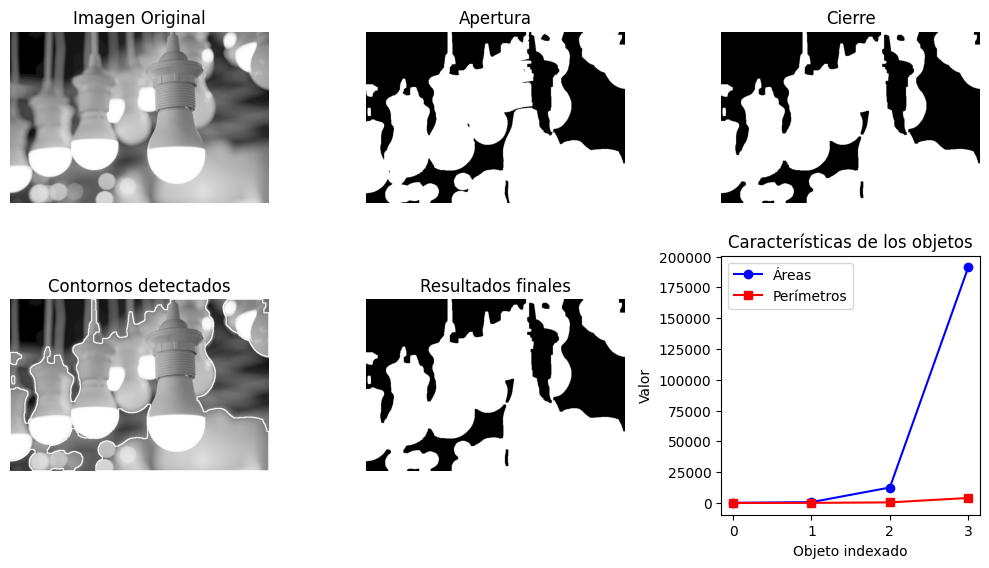

Valores de píxel en (100,200) - Imagen 4:
Original: 112
Apertura: 0
Cierre: 0


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lista de imágenes a procesar
imagenes = ['../image/1.png', '../image/2.png', '../image/3.png', '../image/4.png']

# Crear un kernel para las operaciones morfológicas
kernel = np.ones((7, 7), np.uint8)

for i in range(len(imagenes)):
    # Cargar la imagen en escala de grises
    image = cv2.imread(imagenes[i], cv2.IMREAD_GRAYSCALE)
    
    # Mostrar la imagen original
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Imagen Original')
    plt.axis('off')

    # Preprocesamiento: convertir la imagen a binaria usando umbralización
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Operaciones morfológicas
    # Apertura: elimina el ruido (elimina pequeñas manchas en el fondo)
    opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

    # Cierre: llena los agujeros dentro de los objetos
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

    # Mostrar las imágenes después de las operaciones morfológicas
    plt.subplot(2, 3, 2)
    plt.imshow(opening, cmap='gray')
    plt.title('Apertura')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(closing, cmap='gray')
    plt.title('Cierre')
    plt.axis('off')

    # Detección de contornos para obtener los objetos segmentados
    contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Dibujar los contornos en la imagen original para visualización
    contour_image = cv2.drawContours(np.copy(image), contours, -1, (255, 255, 255), 2)

    # Mostrar los contornos
    plt.subplot(2, 3, 4)
    plt.imshow(contour_image, cmap='gray')
    plt.title('Contornos detectados')
    plt.axis('off')

    # Extraer características geométricas: área y perímetro
    areas = []
    perimeters = []
    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)  # 'True' porque es un contorno cerrado
        areas.append(area)
        perimeters.append(perimeter)

    # Mostrar estadísticas
    print(f"Imagen {i+1}:")
    print("Áreas de los objetos detectados:", areas)
    print("Perímetros de los objetos detectados:", perimeters)
    print("-" * 50)

    # Mostrar los valores de área y perímetro en el documento
    plt.subplot(2, 3, 5)
    plt.imshow(closing, cmap='gray')
    plt.title('Resultados finales')
    plt.axis('off')

    # Mostrar la gráfica con los valores de área y perímetro
    plt.subplot(2, 3, 6)
    if areas and perimeters:  # Solo graficar si hay contornos detectados
        plt.plot(areas, label="Áreas", color="blue", marker='o')
        plt.plot(perimeters, label="Perímetros", color="red", marker='s')
        plt.legend()
        plt.title('Características de los objetos')
        plt.xlabel('Objeto indexado')
        plt.ylabel('Valor')
    else:
        plt.text(0.5, 0.5, 'No se detectaron\ncontornos', 
                horizontalalignment='center', verticalalignment='center',
                transform=plt.gca().transAxes, fontsize=12)
        plt.title('Sin objetos detectados')
    
    plt.tight_layout()
    plt.show()
    
    # Guardar las imágenes procesadas
    cv2.imwrite(f"../image/resultados/morfologias/morfologico/imagen-original-{i+1}.png", image)
    cv2.imwrite(f"../image/resultados/morfologias/morfologico/imagen-apertura-{i+1}.png", opening)
    cv2.imwrite(f"../image/resultados/morfologias/morfologico/imagen-cierre-{i+1}.png", closing)
    cv2.imwrite(f"../image/resultados/morfologias/morfologico/imagen-contornos-{i+1}.png", contour_image)

    print(f"Valores de píxel en (100,200) - Imagen {i+1}:")
    print(f"Original: {image[100, 200]}")
    print(f"Apertura: {opening[100, 200]}")
    print(f"Cierre: {closing[100, 200]}")
    print("=" * 50)

# Operaciones Morfológicas

- Erosión  
- Dilatación  
- Apertura  
- Cierre  
- Gradiente Morfológico  
- Top-Hat  
- Black-Hat  


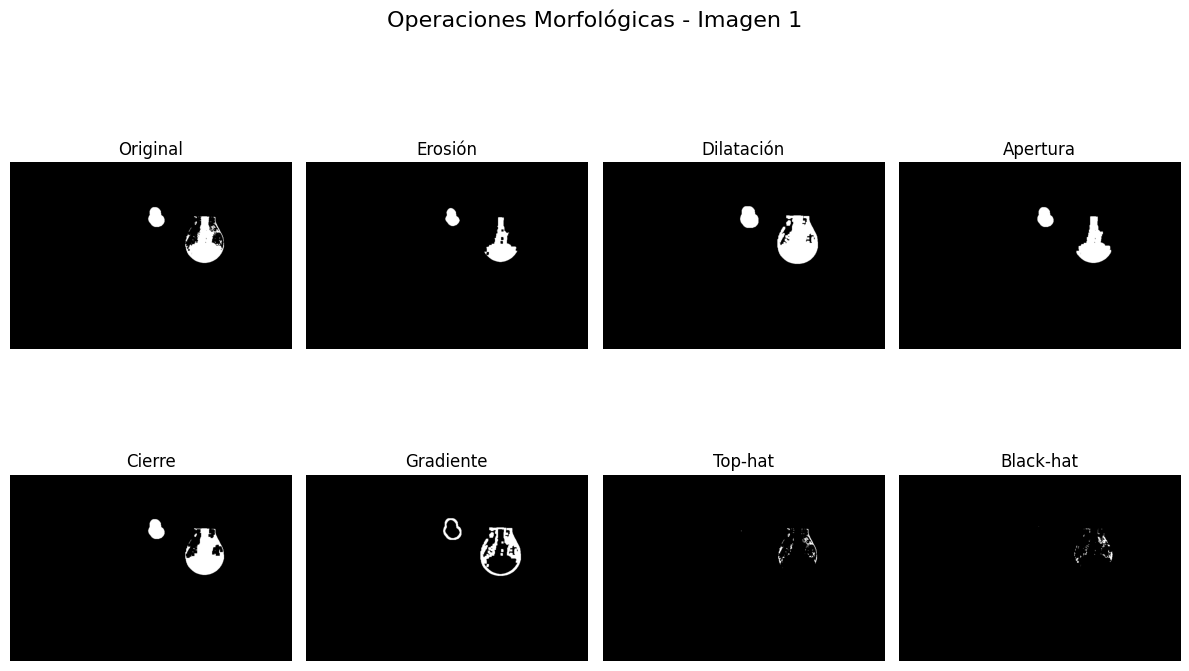

Procesada imagen 1 y guardada en ../image/resultados/morfologias/


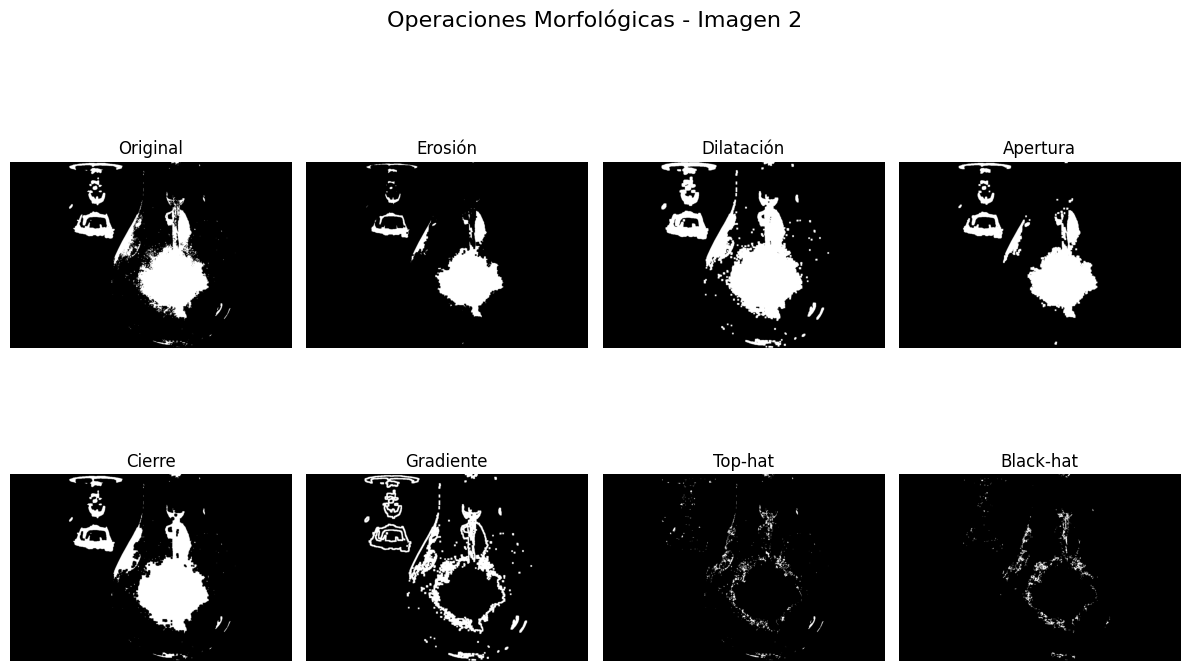

Procesada imagen 2 y guardada en ../image/resultados/morfologias/


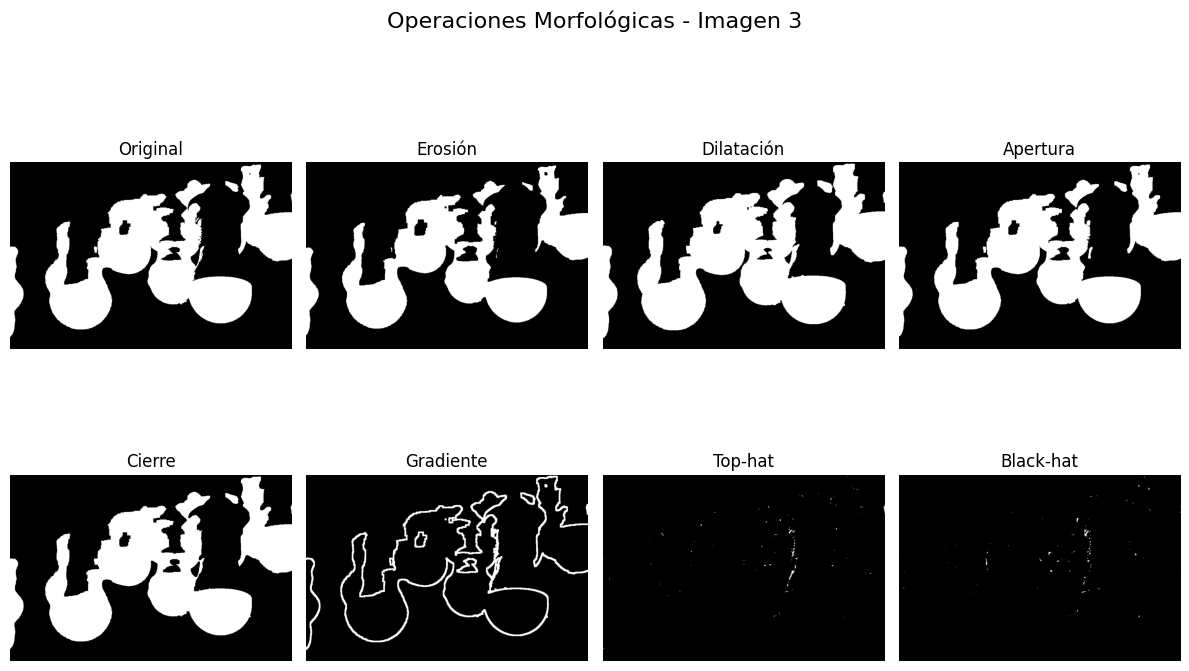

Procesada imagen 3 y guardada en ../image/resultados/morfologias/


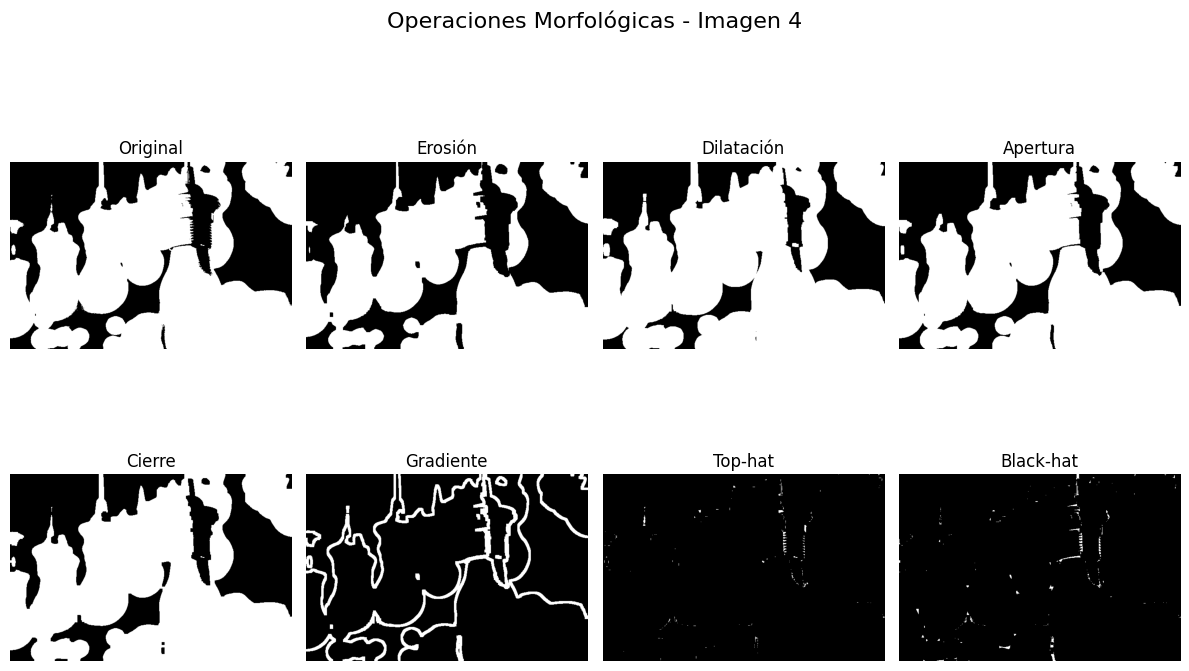

Procesada imagen 4 y guardada en ../image/resultados/morfologias/


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Lista de imágenes a procesar
imagenes = ['../image/1.png', '../image/2.png', '../image/3.png', '../image/4.png']

# Carpeta de salida
output_dir = "../image/resultados/morfologias/"
os.makedirs(output_dir, exist_ok=True)

# Crear un kernel para las operaciones morfológicas
kernel = np.ones((7, 7), np.uint8)

for i, path in enumerate(imagenes):
    # Cargar la imagen en escala de grises
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    # Preprocesamiento: convertir la imagen a binaria usando umbralización
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # ---- Operaciones morfológicas ----
    erosion = cv2.erode(binary_image, kernel, iterations=1)
    dilatacion = cv2.dilate(binary_image, kernel, iterations=1)
    apertura = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
    cierre = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
    gradiente = cv2.morphologyEx(binary_image, cv2.MORPH_GRADIENT, kernel)
    tophat = cv2.morphologyEx(binary_image, cv2.MORPH_TOPHAT, kernel)
    blackhat = cv2.morphologyEx(binary_image, cv2.MORPH_BLACKHAT, kernel)

    # ---- Mostrar resultados ----
    titles = [
        "Original", "Erosión", "Dilatación", "Apertura", 
        "Cierre", "Gradiente", "Top-hat", "Black-hat"
    ]
    images = [
        binary_image, erosion, dilatacion, apertura, 
        cierre, gradiente, tophat, blackhat
    ]

    plt.figure(figsize=(12, 8))
    for j in range(8):
        plt.subplot(2, 4, j+1)
        plt.imshow(images[j], cmap="gray")
        plt.title(titles[j])
        plt.axis("off")
    plt.suptitle(f"Operaciones Morfológicas - Imagen {i+1}", fontsize=16)
    plt.tight_layout()
    plt.show()

    # ---- Guardar resultados ----
    cv2.imwrite(os.path.join(output_dir, f"imagen{i+1}_original.png"), binary_image)
    cv2.imwrite(os.path.join(output_dir, f"imagen{i+1}_erosion.png"), erosion)
    cv2.imwrite(os.path.join(output_dir, f"imagen{i+1}_dilatacion.png"), dilatacion)
    cv2.imwrite(os.path.join(output_dir, f"imagen{i+1}_apertura.png"), apertura)
    cv2.imwrite(os.path.join(output_dir, f"imagen{i+1}_cierre.png"), cierre)
    cv2.imwrite(os.path.join(output_dir, f"imagen{i+1}_gradiente.png"), gradiente)
    cv2.imwrite(os.path.join(output_dir, f"imagen{i+1}_tophat.png"), tophat)
    cv2.imwrite(os.path.join(output_dir, f"imagen{i+1}_blackhat.png"), blackhat)

    print(f"Procesada imagen {i+1} y guardada en {output_dir}")


# Esqueletizacion

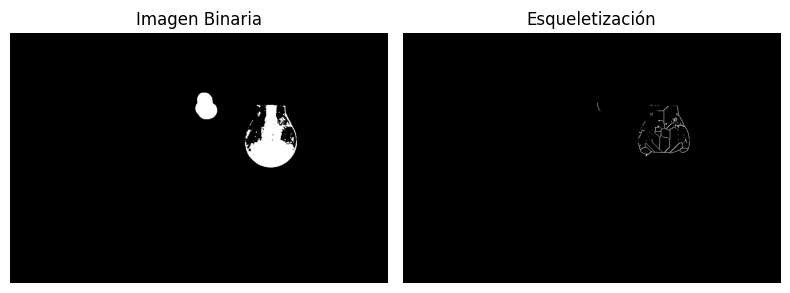

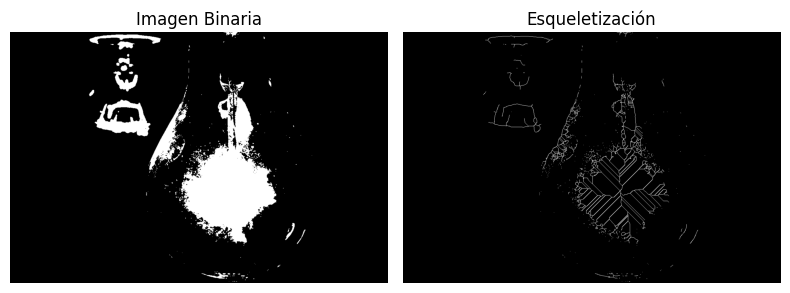

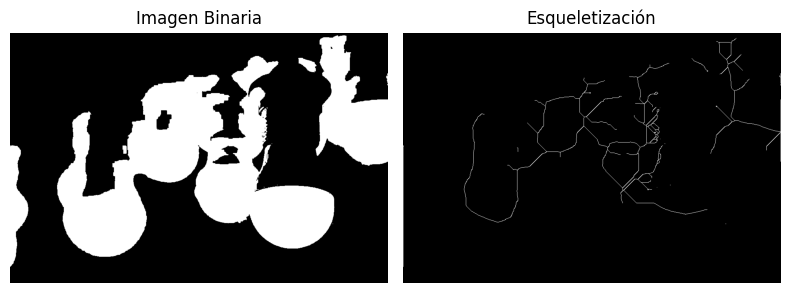

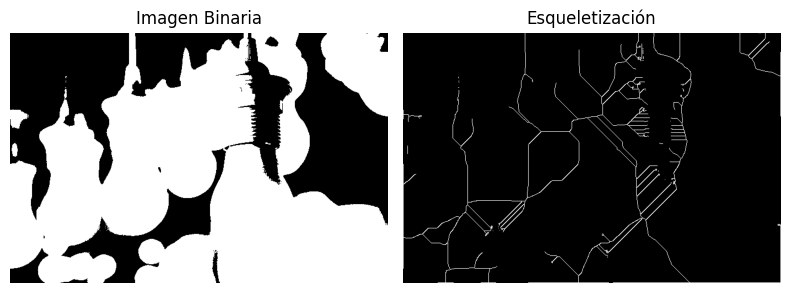

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lista de imágenes originales
imagenes = ['../image/1.png', '../image/2.png', '../image/3.png', '../image/4.png']

for i in range(len(imagenes)):
    # Cargar la imagen en escala de grises
    image = cv2.imread(imagenes[i], cv2.IMREAD_GRAYSCALE)

    # Umbralizar para obtener binaria
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Esqueletización con OpenCV contrib
    skeleton = cv2.ximgproc.thinning(binary_image)

    # Mostrar resultados
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(binary_image, cmap='gray')
    plt.title("Imagen Binaria")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(skeleton, cmap='gray')
    plt.title("Esqueletización")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    # Guardar resultado
    cv2.imwrite(f"../image/resultados/morfologias/esqueletizacion/imagen-esqueleto-{i+1}.png", skeleton)


# Análisis de propiedades (regionprops)

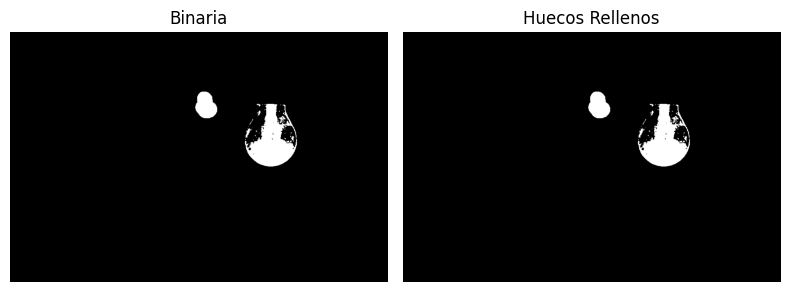

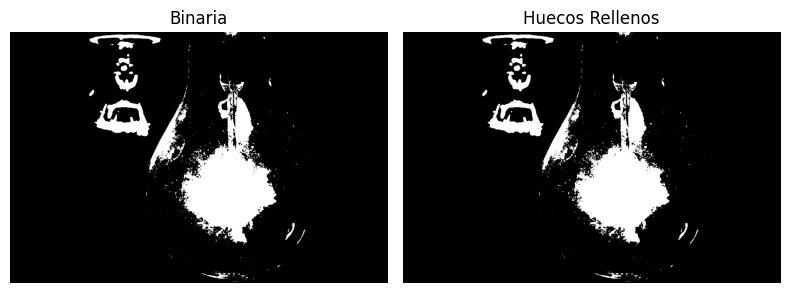

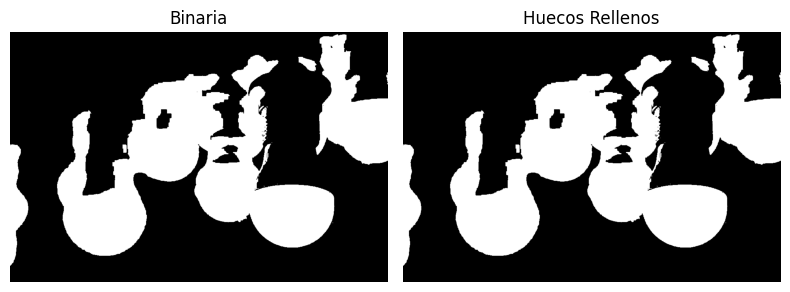

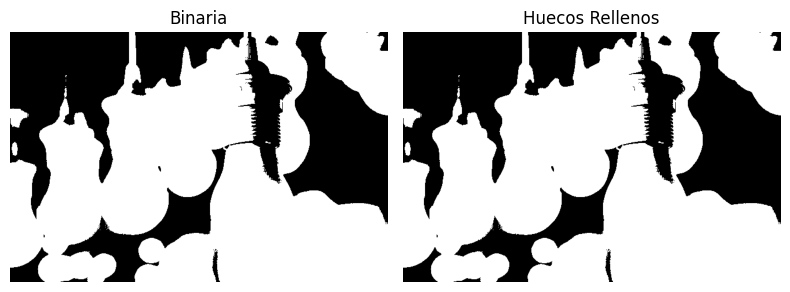

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lista de imágenes originales
imagenes = ['../image/1.png', '../image/2.png', '../image/3.png', '../image/4.png']

for i in range(len(imagenes)):
    # Cargar la imagen en escala de grises
    image = cv2.imread(imagenes[i], cv2.IMREAD_GRAYSCALE)

    # Umbralizar
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Invertir para preparar floodFill
    inv_img = cv2.bitwise_not(binary_image)

    # Crear máscara para floodFill (2 pixeles más grandes)
    h, w = inv_img.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)

    # FloodFill desde la esquina (0,0)
    floodfilled = inv_img.copy()
    cv2.floodFill(floodfilled, mask, (0,0), 255)

    # Invertir floodfilled y combinar con binaria original
    floodfilled_inv = cv2.bitwise_not(floodfilled)
    filled_image = binary_image | floodfilled_inv

    # Mostrar resultados
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(binary_image, cmap='gray')
    plt.title("Binaria")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(filled_image, cmap='gray')
    plt.title("Huecos Rellenos")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    # Guardar resultado
    cv2.imwrite(f"../image/resultados/morfologias/huecos/imagen-huecos-{i+1}.png", filled_image)


Imagen 1 - Objeto:
  Área: 2576.0
  Perímetro: 197.34
  Centroide: (np.float64(181.71622670807454), np.float64(478.7888198757764))
  Orientación: 16.54 grados
  Bounding Box: (148, 453, 213, 507)
--------------------------------------------------
Imagen 1 - Objeto:
  Área: 9844.0
  Perímetro: 1116.32
  Centroide: (np.float64(268.7025599349858), np.float64(640.7537586347013))
  Orientación: -8.23 grados
  Bounding Box: (178, 575, 331, 702)
--------------------------------------------------
Imagen 1 - Objeto:
  Área: 130.0
  Perímetro: 64.49
  Centroide: (np.float64(247.6), np.float64(582.0))
  Orientación: -24.22 grados
  Bounding Box: (238, 575, 261, 591)
--------------------------------------------------
Imagen 1 - Objeto:
  Área: 51.0
  Perímetro: 31.38
  Centroide: (np.float64(262.0), np.float64(691.3921568627451))
  Orientación: 4.07 grados
  Bounding Box: (256, 688, 271, 695)
--------------------------------------------------
✅ Imagen 1 guardada en: ../image/resultados/morfologias

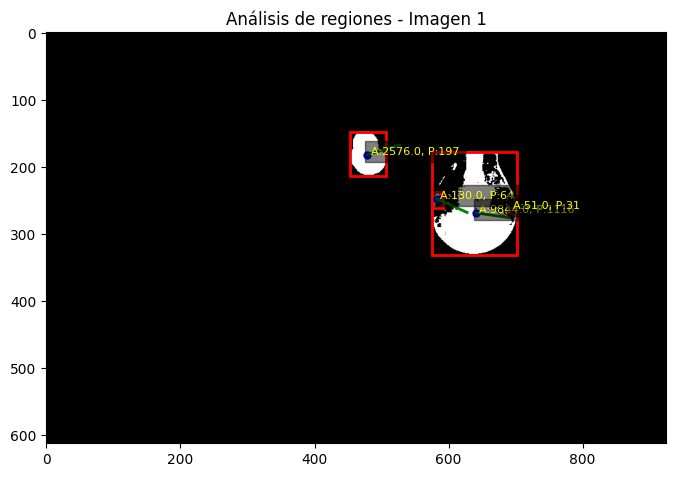

Imagen 2 - Objeto:
  Área: 96.0
  Perímetro: 50.35
  Centroide: (np.float64(3.6979166666666665), np.float64(688.03125))
  Orientación: 80.12 grados
  Bounding Box: (0, 680, 11, 695)
--------------------------------------------------
Imagen 2 - Objeto:
  Área: 192.0
  Perímetro: 70.28
  Centroide: (np.float64(4.625), np.float64(706.6145833333334))
  Orientación: -80.55 grados
  Bounding Box: (0, 696, 16, 720)
--------------------------------------------------
Imagen 2 - Objeto:
  Área: 2649.0
  Perímetro: 534.76
  Centroide: (np.float64(18.060400151000376), np.float64(365.85768214420534))
  Orientación: 89.91 grados
  Bounding Box: (8, 251, 38, 478)
--------------------------------------------------
Imagen 2 - Objeto:
  Área: 852.0
  Perímetro: 149.78
  Centroide: (np.float64(40.671361502347416), np.float64(363.90962441314554))
  Orientación: -89.35 grados
  Bounding Box: (29, 339, 56, 394)
--------------------------------------------------
Imagen 2 - Objeto:
  Área: 626.0
  Perímetro: 

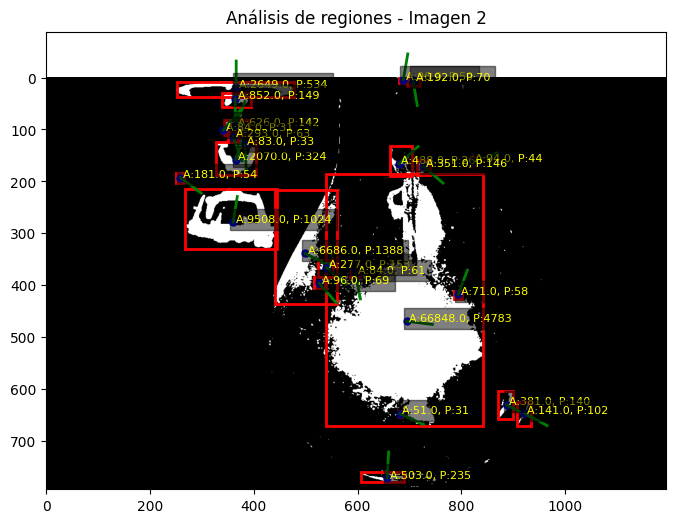

Imagen 3 - Objeto:
  Área: 38687.0
  Perímetro: 1300.44
  Centroide: (np.float64(209.18440302944143), np.float64(911.2903817819939))
  Orientación: 20.01 grados
  Bounding Box: (9, 817, 357, 1011)
--------------------------------------------------
Imagen 3 - Objeto:
  Área: 172290.0
  Perímetro: 5387.09
  Centroide: (np.float64(371.56422891636197), np.float64(483.79153752394217))
  Orientación: -87.34 grados
  Bounding Box: (64, 126, 600, 868)
--------------------------------------------------
Imagen 3 - Objeto:
  Área: 1062.0
  Perímetro: 154.47
  Centroide: (np.float64(86.75894538606403), np.float64(796.4604519774011))
  Orientación: 57.46 grados
  Bounding Box: (69, 771, 108, 820)
--------------------------------------------------
Imagen 3 - Objeto:
  Área: 73.0
  Perímetro: 50.90
  Centroide: (np.float64(122.46575342465754), np.float64(1008.8356164383562))
  Orientación: 1.60 grados
  Bounding Box: (110, 1006, 137, 1011)
--------------------------------------------------
Imagen 3 -

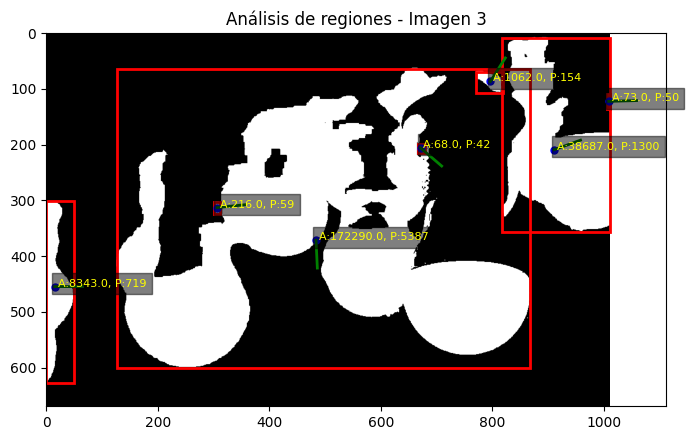

Imagen 4 - Objeto:
  Área: 180776.0
  Perímetro: 6005.50
  Centroide: (np.float64(276.8452283488959), np.float64(334.114406779661))
  Orientación: 86.18 grados
  Bounding Box: (0, 0, 455, 686)
--------------------------------------------------
Imagen 4 - Objeto:
  Área: 12803.0
  Perímetro: 519.78
  Centroide: (np.float64(60.85206592204952), np.float64(633.7789580567055))
  Orientación: 35.06 grados
  Bounding Box: (0, 564, 153, 686)
--------------------------------------------------
Imagen 4 - Objeto:
  Área: 765.0
  Perímetro: 129.05
  Centroide: (np.float64(155.30196078431374), np.float64(12.652287581699346))
  Orientación: -27.02 grados
  Bounding Box: (140, 0, 175, 34)
--------------------------------------------------
Imagen 4 - Objeto:
  Área: 208.0
  Perímetro: 60.38
  Centroide: (np.float64(213.36057692307693), np.float64(8.057692307692308))
  Orientación: 1.61 grados
  Bounding Box: (201, 3, 226, 14)
--------------------------------------------------
✅ Imagen 4 guardada en: .

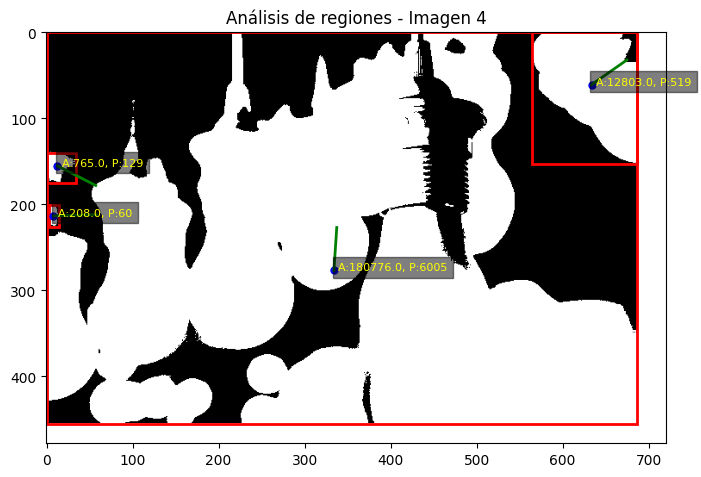

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
import os

# Lista de imágenes originales
imagenes = ['../image/1.png', '../image/2.png', '../image/3.png', '../image/4.png']

# Carpeta donde guardar los resultados
output_dir = "../image/resultados/morfologias/regionprops/"
os.makedirs(output_dir, exist_ok=True)

for i in range(len(imagenes)):
    # Cargar imagen en escala de grises
    image = cv2.imread(imagenes[i], cv2.IMREAD_GRAYSCALE)

    # Binarizar (ajusta el threshold si es necesario)
    _, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    # Convertir a etiquetas de regiones
    labeled = label(binary)

    # Medir propiedades de cada región
    props = regionprops(labeled)

    # Mostrar imagen y propiedades
    fig, ax = plt.subplots(figsize=(8,6))
    ax.imshow(binary, cmap='gray')
    ax.set_title(f"Análisis de regiones - Imagen {i+1}")

    for region in props:
        # Solo considerar regiones suficientemente grandes (para evitar ruido)
        if region.area >= 50:
            # Extraer propiedades
            y0, x0 = region.centroid
            minr, minc, maxr, maxc = region.bbox
            orientation = region.orientation
            area = region.area
            perimeter = region.perimeter

            # Dibujar bounding box
            rect = plt.Rectangle((minc, minr), maxc-minc, maxr-minr,
                                 fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)

            # Dibujar centroide
            ax.plot(x0, y0, 'bo', markersize=5)

            # Mostrar texto con propiedades principales
            ax.text(x0+5, y0, f"A:{area}, P:{int(perimeter)}",
                    color='yellow', fontsize=8, bbox=dict(facecolor='black', alpha=0.5))

            # Mostrar orientación (una línea indicando dirección principal)
            x1 = x0 + np.cos(orientation) * 50
            y1 = y0 - np.sin(orientation) * 50
            ax.plot((x0, x1), (y0, y1), '-g', linewidth=2)

            # Imprimir resultados en consola
            print(f"Imagen {i+1} - Objeto:")
            print(f"  Área: {area}")
            print(f"  Perímetro: {perimeter:.2f}")
            print(f"  Centroide: {region.centroid}")
            print(f"  Orientación: {np.degrees(orientation):.2f} grados")
            print(f"  Bounding Box: {region.bbox}")
            print("-"*50)

    # Guardar resultado
    output_path = os.path.join(output_dir, f"imagen-regionprops-{i+1}.png")
    plt.savefig(output_path, dpi=150, bbox_inches="tight")
    print(f"✅ Imagen {i+1} guardada en: {output_path}")

    # Mostrar imagen
    plt.show()
